In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [118]:
Train = pd.read_csv(r'C:/Users/preeti nayak/Desktop/DATA ANALYST/Python_Class/Practice Datasets for EDA/Titanic_Train.csv')

In [152]:
Test = pd.read_csv(r'C:/Users/preeti nayak/Desktop/DATA ANALYST/Python_Class/Practice Datasets for EDA/Titanic_Test.csv')

## Performing EDA of Datasets

In [23]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Finding Missing Values

In [27]:
Train.Age.isna().sum()

177

In [28]:
Train.Cabin.isna().sum()

687

In [29]:
Train.Embarked.isna().sum()

2

In [30]:
Train[Train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## Visually Analyzing the Data
## Fare Distribution amongst passengers

Text(0, 0.5, 'Number of passengers')

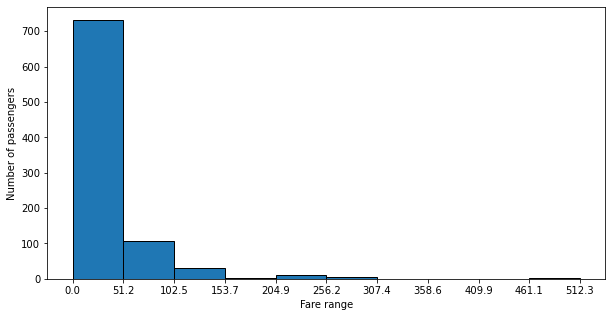

In [15]:
count,bin_edges=np.histogram(Train.Fare)
Train.Fare.plot.hist(xticks=bin_edges,figsize=(10,5),edgecolor="black")
plt.xlabel("Fare range")
plt.ylabel("Number of passengers")

## Gender and Age wise Survival

<AxesSubplot:title={'center':'Girls Survived'}>

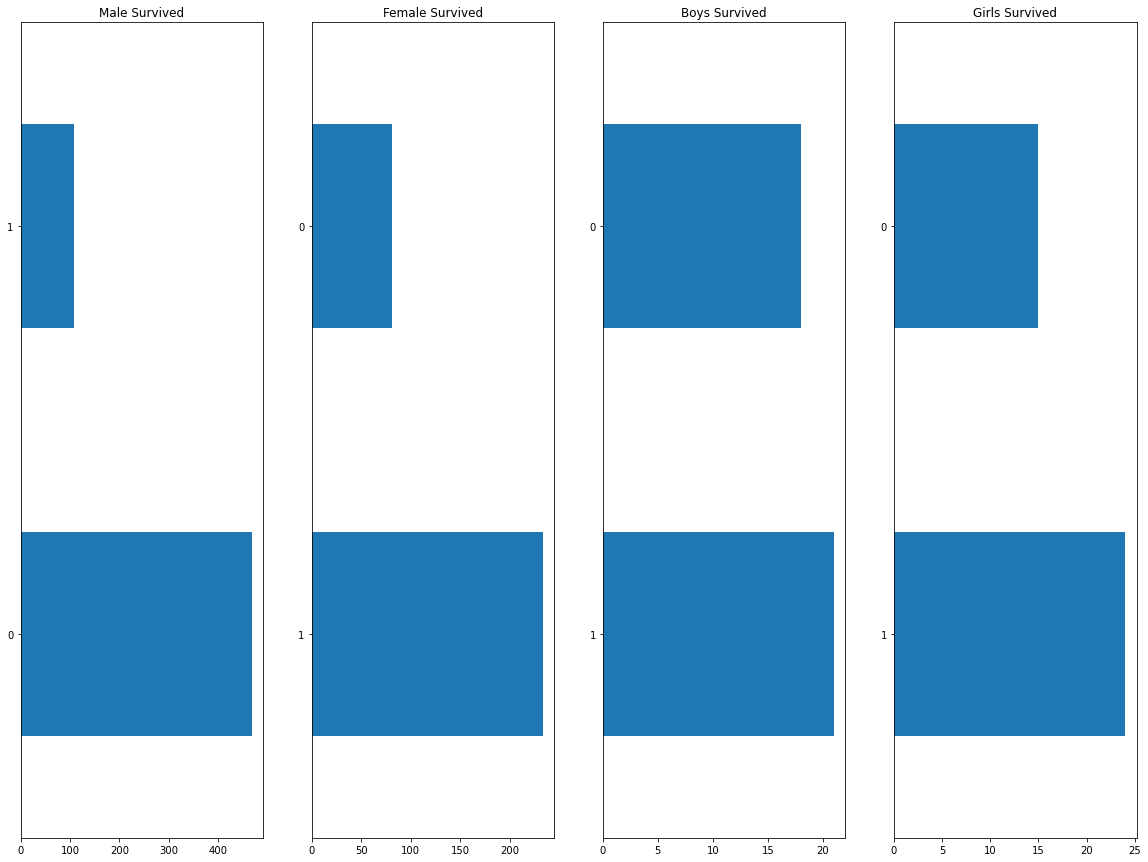

In [31]:
f,a=plt.subplots(1,4,figsize=(20,15))
Train[Train.Sex=='male'].Survived.value_counts().plot(kind="barh",ax=a[0],title = "Male Survived")
Train[Train.Sex=='female'].Survived.value_counts().plot(kind="barh",ax=a[1],title = "Female Survived")
Train[(Train.Age<15)&(Train.Sex=='male')].Survived.value_counts().plot.barh(ax=a[2],title = "Boys Survived")
Train[(Train.Sex=='female')&(Train.Age<15)].Survived.value_counts().plot.barh(ax=a[3],title = "Girls Survived")

## As seen above the Female gender survived more than Male gender.


In [32]:
Train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Extracting Titles of the passengers from 'Train' dataset

In [33]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split(".")[0].strip()
    else:
        return "unknown"

In [34]:
Train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [35]:
Train["Titles"]=[x for x in Train.Name.apply(get_title)]

## Replacing Titles with conventional ones

In [36]:
def replace_titles(y):
    x=y["Titles"]
    if x in ['Capt','Col','Don','Jonkheer','Major','Rev','Sir']:
        return "Mr"
    elif x in ['the Countess', 'Mme','Lady']:
        return "Mrs"
    elif x in ['Mlle','Ms']:
        return "Miss"
    elif x=="Dr":
        if y ["Sex"]=="Male":
            return "Mr"
        else: 
            return "Mrs"
    else:
        return x

In [37]:
Train["Titles"]=Train.apply(replace_titles, axis=1)

In [38]:
Train.Titles.value_counts()

Mr        531
Miss      185
Mrs       135
Master     40
Name: Titles, dtype: int64

## Imputation of missing values in the 'Train' dataset

### The null values of the Age feature were imputed with the mean values after categorizing the observations based on their titles

In [39]:
m_c=Train.Age[Train.Titles=="Master"].mean()

In [40]:
Train.Age[Train.Titles=="Master"]=Train.Age[Train.Titles=="Master"].fillna(m_c)

<ipython-input-40-8bd3c9705b56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train.Age[Train.Titles=="Master"]=Train.Age[Train.Titles=="Master"].fillna(m_c)


In [41]:
m_m=Train.Age[(Train.Titles=="Mr")].mean()

In [42]:
Train.Age[(Train.Titles=="Mr")]=Train.Age[(Train.Titles=="Mr")].fillna(m_m)

<ipython-input-42-a8d55b6173ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train.Age[(Train.Titles=="Mr")]=Train.Age[(Train.Titles=="Mr")].fillna(m_m)


In [43]:
m_w=Train.Age[(Train.Titles=="Mrs")].mean()

In [44]:
Train.Age[(Train.Titles=="Mrs")]=Train.Age[(Train.Titles=="Mrs")].fillna(m_w)

<ipython-input-44-ffb3ce247472>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train.Age[(Train.Titles=="Mrs")]=Train.Age[(Train.Titles=="Mrs")].fillna(m_w)


In [45]:
m_g=Train.Age[(Train.Titles=="Miss")].mean()

In [46]:
Train.Age[(Train.Titles=="Miss")]=Train.Age[(Train.Titles=="Miss")].fillna(m_g)

<ipython-input-46-6e5bc2730a50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train.Age[(Train.Titles=="Miss")]=Train.Age[(Train.Titles=="Miss")].fillna(m_g)


## The null values of Cabin and Embarked features imputed with the most occuring value, as the values are categorical in nature.

In [47]:
Train.Cabin.describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [48]:
Train.Cabin=Train.Cabin.fillna('C23 C25 C27')

In [49]:
Train.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [8]:
Train.Embarked=Train.Embarked.fillna("S")

In [9]:
Train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

## Extracting Titles of the passengers from 'Test' dataset

In [50]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split(".")[0].strip()
    else:
        return "unknown"

In [51]:
Test["Titles"]=[x for x in Test.Name.apply(get_title)]

### Replacing Titles with the conventional ones

In [52]:
Test["Titles"]=Test.apply(replace_titles,axis=1)

In [53]:
Test.Titles.value_counts()

Mr        244
Miss       79
Mrs        73
Master     21
Dona        1
Name: Titles, dtype: int64

## Imputation of missing values in the 'Test' dataset

In [54]:
m_c_t=Test.Age[Test.Titles=="Master"].mean()

In [55]:
Test.Age[Test.Titles=="Master"]=Test.Age[Test.Titles=="Master"].fillna(m_c_t)

<ipython-input-55-b627e7c19dac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test.Age[Test.Titles=="Master"]=Test.Age[Test.Titles=="Master"].fillna(m_c_t)


In [56]:
m_m_t=Test.Age[(Test.Titles=="Mr")].mean()

In [57]:
Test.Age[(Test.Titles=="Mr")]= Test.Age[(Test.Titles=="Mr")].fillna(m_m_t)

<ipython-input-57-d25ad1be4f97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test.Age[(Test.Titles=="Mr")]= Test.Age[(Test.Titles=="Mr")].fillna(m_m_t)


In [58]:
m_w_t=Test.Age[(Test.Titles=="Mrs")].mean()

In [59]:
Test.Age[(Test.Titles=="Mrs")]= Test.Age[(Test.Titles=="Mrs")].fillna(m_w_t)

<ipython-input-59-62d4567301ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test.Age[(Test.Titles=="Mrs")]= Test.Age[(Test.Titles=="Mrs")].fillna(m_w_t)


In [60]:
m_g_t=Test.Age[(Test.Titles=="Miss")].mean()

In [61]:
Test.Age[(Test.Titles=="Miss")]= Test.Age[(Test.Titles=="Miss")].fillna(m_g_t)

<ipython-input-61-4cdcb9a506b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test.Age[(Test.Titles=="Miss")]= Test.Age[(Test.Titles=="Miss")].fillna(m_g_t)


## The missing values of the Fare were imputed with the mean value, since the values are continuous in nature

In [65]:
Test.Fare=Test.Fare.fillna(Test.Fare.mean())

In [66]:
Test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Titles           0
dtype: int64

In [67]:
Test.Cabin.describe()

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object

In [68]:
Test.Cabin=Test.Cabin.fillna("B57 B59 B63 B66")

In [69]:
Test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Titles         0
dtype: int64

In [70]:
Test.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

## Replacing categorical values of the features with numeric values as Machine Learning classification algorithm doesn't work with independent features that are categorical and not numeric.

In [71]:
E_Map={"S":0,"C":1,"Q":2}

In [72]:
Train.Embarked=Train.Embarked.map(E_Map)

In [106]:
Train.Embarked.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Embarked, dtype: float64

In [74]:
S_map={"male":0,"female":1}

In [75]:
Train.Sex=Train.Sex.map(S_map)

In [76]:
T_m={"Mr":0,"Mrs":1,"Miss":2,"Master":3}

In [77]:
Train.Titles=Train.Titles.map(T_m)

In [78]:
T_m_T={"Mr":0,"Mrs":1,"Miss":2,"Master":3,"Dona":4}

In [82]:
Test.Sex=Test.Sex.map(S_map)
Test.Titles=Test.Titles.map(T_m_T)
Test.Embarked=Test.Embarked.map(E_Map)

In [85]:
Test.Sex=Test.Sex.fillna(0)

In [88]:
Test.Sex.isna().sum()

0

In [89]:
Test.Sex.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Sex, dtype: float64

In [91]:
Test.Titles=Test.Titles.fillna(0)

In [92]:
Test.Titles.isna().sum()

0

In [93]:
Test.Titles.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Titles, dtype: float64

## Determining the co-relation coefficient and the P value in-order to decide which independent variables are redundant for implemention of a classification model

In [97]:
stats.pearsonr(Train["Survived"],Train["PassengerId"])

(-0.005006660767066517, 0.8813657768789032)

In [95]:
stats.pearsonr(Train['Survived'], Train["Pclass"])

(-0.3384810359610166, 2.537047387977477e-25)

In [98]:
stats.pearsonr(Train['Survived'], Train["Sex"])

(0.5433513806577593, 1.4060661308747188e-69)

In [99]:
stats.pearsonr(Train['Survived'], Train["Age"])

(-0.0910774519682957, 0.006518977472395494)

In [100]:
stats.pearsonr(Train['Survived'], Train["SibSp"])

(-0.03532249888573566, 0.29224392869800203)

In [101]:
stats.pearsonr(Train['Survived'], Train["Parch"])

(0.08162940708348386, 0.014799245374711896)

In [102]:
stats.pearsonr(Train['Survived'], Train["Fare"])

(0.25730652238496377, 6.120189341916209e-15)

In [110]:
stats.pearsonr(Train['Survived'], Train['Titles'])

(0.47375140850982056, 4.831651026046167e-51)

## These variables were dropped because they were negatively co-related and their P-values were more than 0.05

In [111]:
Train.drop(["PassengerId","SibSp","Ticket","Cabin","Name"], axis=1,inplace=True)

In [112]:
Test.drop(["PassengerId","SibSp","Ticket","Cabin","Name"], axis=1,inplace=True)

In [113]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    float64
 7   Titles    891 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [114]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    float64
 2   Age       418 non-null    float64
 3   Parch     418 non-null    int64  
 4   Fare      418 non-null    float64
 5   Embarked  0 non-null      float64
 6   Titles    418 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 23.0 KB


In [115]:
Pred_vars=["Pclass", "Sex", "Age", "Parch","Fare", "Embarked","Titles"]

## Partitioning the 'Train' data into x and y in-order to split the data for implementing the ML model

In [116]:
x,y=Train[Pred_vars], Train[["Survived"]]

## Normalizing the 'Train' dataset for creating uniformity in the data so as to obtain better accuracy of the ML model

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
x=StandardScaler().fit_transform(x)

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [123]:
X_train[0:5]

array([[ 0.82737724,  1.35557354,  0.47899316,  2.00893337, -0.34145224,
         1.00313924,  0.31573729],
       [-0.36936484, -0.73769513,  0.08835691, -0.47367361, -0.43700744,
        -0.56968402, -0.74186393],
       [-0.36936484, -0.73769513,  0.08835691,  0.76762988,  0.09664634,
         1.00313924, -0.74186393],
       [ 0.82737724, -0.73769513, -0.7398949 , -0.47367361, -0.56763122,
         1.00313924, -0.74186393],
       [ 0.82737724, -0.73769513, -0.66459929, -0.47367361, -0.50244517,
        -0.56968402, -0.74186393]])

In [125]:
len(X_train)

712

In [126]:
len(X_test)

179

In [ ]:
from sklearn.linear_model import LogisticRegression

logReg=LogisticRegression()

logReg.fit(X_train,y_train)

In [131]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='warn', solver='warn')

In [135]:
logReg.fit(X_test,y_test)

C:\Users\preeti nayak\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [136]:
y_hat=logReg.predict(X_test)

In [137]:
y_hat

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [139]:
from sklearn.metrics import accuracy_score, f1_score

In [140]:
accuracy_score(y_test,y_hat)

0.776536312849162

In [141]:
f1_score(y_test,y_hat)

0.696969696969697

## RandomForestClassifier for improved accuracy

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

In [145]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_estimators=10)

In [147]:
rfc.fit(X_test,y_test)

<ipython-input-147-648072b93ef7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_test,y_test)


RandomForestClassifier()

In [148]:
y_hat=rfc.predict(X_test)

In [149]:
accuracy_score(y_test,y_hat)

1.0